In [2]:
from matplotlib.offsetbox import AnchoredText
import numpy as np 
import pandas as pd 
import datetime as dt
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import seaborn as sns

In [4]:
plt.style.use('ggplot')

In [96]:
df = pd.read_csv("bitcoin_dataset.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.index =df['Date'].values
print(df)
time = pd.DataFrame(df[['btc_market_price','Date']].groupby('Date').mean())
time

                 Date  btc_market_price  btc_total_bitcoins  btc_market_cap  \
2010-02-17 2010-02-17           0.00000           2043200.0    0.000000e+00   
2010-02-18 2010-02-18           0.00000           2054650.0    0.000000e+00   
2010-02-19 2010-02-19           0.00000           2063600.0    0.000000e+00   
2010-02-20 2010-02-20           0.00000           2074700.0    0.000000e+00   
2010-02-21 2010-02-21           0.00000           2085400.0    0.000000e+00   
2010-02-22 2010-02-22           0.00000           2098150.0    0.000000e+00   
2010-02-23 2010-02-23           0.00000           2110700.0    0.000000e+00   
2010-02-24 2010-02-24           0.00000           2120200.0    0.000000e+00   
2010-02-25 2010-02-25           0.00000           2127600.0    0.000000e+00   
2010-02-26 2010-02-26           0.00000           2136100.0    0.000000e+00   
2010-02-27 2010-02-27           0.00000           2144750.0    0.000000e+00   
2010-02-28 2010-02-28           0.00000           21

,btc_market_price
Date,
2010-02-17,0.00000
2010-02-18,0.00000
2010-02-19,0.00000
2010-02-20,0.00000
2010-02-21,0.00000
2010-02-22,0.00000
2010-02-23,0.00000
2010-02-24,0.00000
2010-02-25,0.00000


In [94]:
df.dtypes

Date                                                   datetime64[ns]
btc_market_price                                              float64
btc_total_bitcoins                                            float64
btc_market_cap                                                float64
btc_trade_volume                                              float64
btc_blocks_size                                               float64
btc_avg_block_size                                            float64
btc_n_orphaned_blocks                                           int64
btc_n_transactions_per_block                                  float64
btc_median_confirmation_time                                  float64
btc_hash_rate                                                 float64
btc_difficulty                                                float64
btc_miners_revenue                                            float64
btc_transaction_fees                                          float64
btc_cost_per_transac

In [73]:
sns.tsplot(df['btc_market_price'], time=time.index, condition='Time Series', color='red')

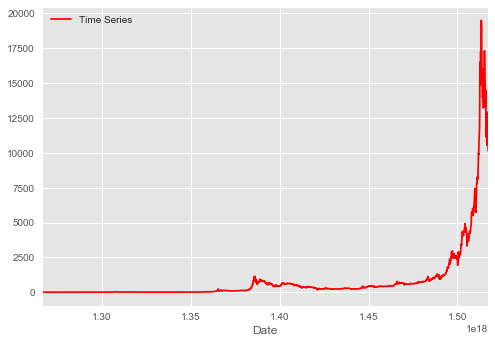

In [74]:
plt.show()

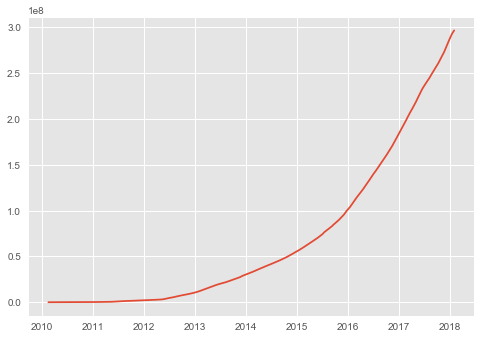

In [75]:
# Number of transactions Vs Date
plt.plot(df['Date'], df['btc_n_transactions_total'])
plt.show()

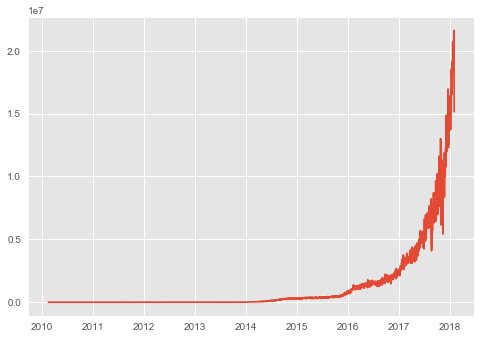

In [77]:
# Bicoin Hash rate Vs Date
plt.plot(df['Date'], df['btc_hash_rate'])
plt.show()

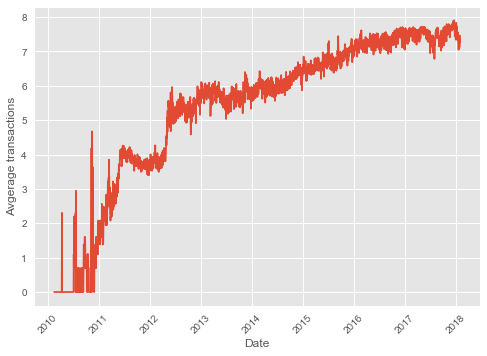

In [82]:
# Date Vs Average Transactions per block.
plt.plot(df['Date'], np.log(df['btc_n_transactions_per_block']))
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Avgerage transactions')
plt.show()

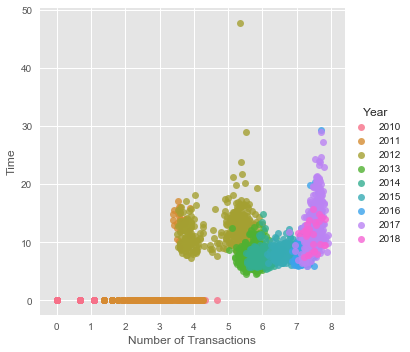

In [93]:
# Conformation time Vs Transactions per Year
df['Year'] = df['Date'].apply(lambda x: x.year)

sns.lmplot('btc_n_transactions_per_block','btc_median_confirmation_time',
data= pd.concat([df['btc_median_confirmation_time'],
            np.log(df['btc_n_transactions_per_block']),
            df['Year']],axis=1),hue='Year',fit_reg=False)

plt.xlabel('Number of Transactions')
plt.ylabel('Time')
plt.show()